We make an initial exploration of the data

In [273]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [274]:
df = pd.read_csv('../data/telecom_sales_data.csv')
df.head()

,Unnamed: 0,marketing_score,competition_index,customer_satisfaction,purchasing_power_index,weather_condition,tech_event,5g_phase,store_traffic,public_transport,city,jPhone_Pro_revenue,Kaggle_Pixel_5_revenue,Planet_SX_revenue
0,2019-01-01,100.00,50.00,85.0,120.00,Bad,NaN,Pre-5G,0.02,Hub,Paris,122182.54,68709.20,36032.11
1,2019-01-02,100.09,50.52,85.0,120.09,Good,NaN,Pre-5G,1.08,Good,Paris,146473.79,73935.56,44180.21
2,2019-01-03,100.18,51.04,85.0,120.17,Moderate,NaN,Pre-5G,-0.24,Limited,Paris,129647.90,75375.54,41112.52
3,2019-01-04,100.27,51.56,85.0,120.26,Moderate,NaN,Pre-5G,-0.13,Poor,Paris,137621.01,85213.00,46222.99
4,2019-01-05,100.36,52.08,85.0,120.34,Bad,NaN,Pre-5G,0.06,Limited,Paris,194936.87,89281.49,38312.08


We adjust the data

In [275]:
# rename first column to 'date'
df.rename(columns={'Unnamed: 0': 'date'}, inplace=True)

# convert date to datetime
df['date'] = pd.to_datetime(df['date'])

# for ease of use
jphone = 'jPhone_Pro_revenue'
kaggle = 'Kaggle_Pixel_5_revenue'
planet = 'Planet_SX_revenue'

# remove nan errors
df['tech_event'] = df['tech_event'].fillna('')

# Exploration of Variables

We make exploration of different variables

## Time

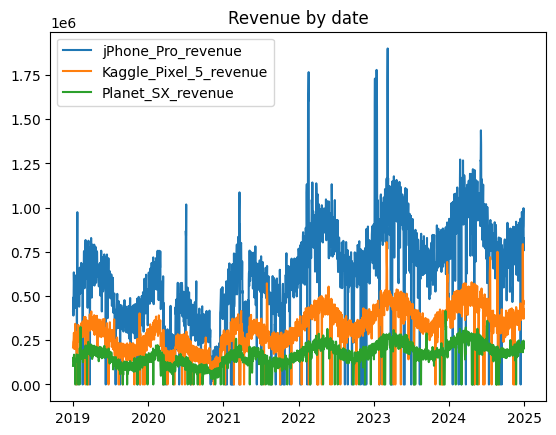

In [276]:
# time
df_by_date = df.groupby('date').sum()
dates = df_by_date.index

# plot
plt.plot(dates, df_by_date[jphone], label=jphone)
plt.plot(dates, df_by_date[kaggle], label=kaggle)
plt.plot(dates, df_by_date[planet], label=planet)
plt.legend()
plt.title('Revenue by date');

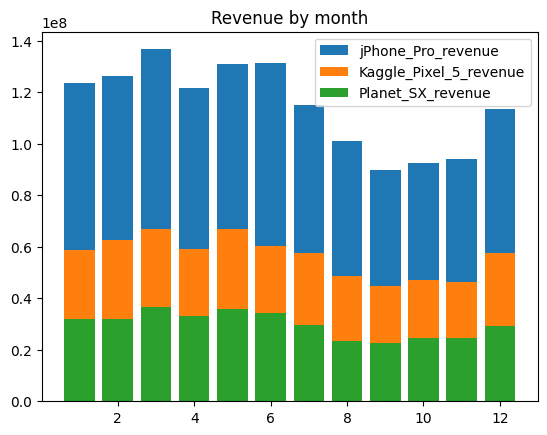

In [277]:
# by month
months = df_by_date.index.month
df_by_month = df_by_date.groupby(months).sum()

# plot
plt.bar(df_by_month.index, df_by_month[jphone], label=jphone)
plt.bar(df_by_month.index, df_by_month[kaggle], label=kaggle)
plt.bar(df_by_month.index, df_by_month[planet], label=planet)
plt.legend()
plt.title('Revenue by month');

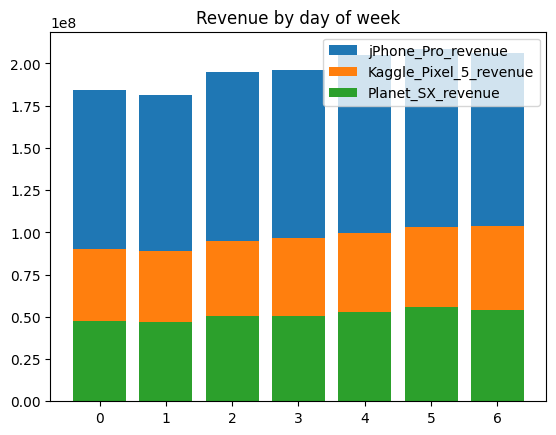

In [278]:
# by day of week
days = df_by_date.index.dayofweek
df_by_day = df_by_date.groupby(days).sum()

# plot
plt.bar(df_by_day.index, df_by_day[jphone], label=jphone)
plt.bar(df_by_day.index, df_by_day[kaggle], label=kaggle)
plt.bar(df_by_day.index, df_by_day[planet], label=planet)
plt.legend()
plt.title('Revenue by day of week');

from this, we conclude that the only likely predictor of the target variable is the month, as day day and the date does not seem to strongly predict the revenue.

## Marketing

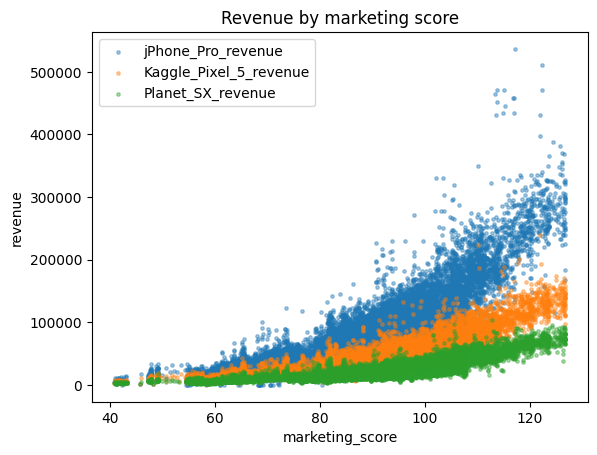

In [279]:
plt.scatter(df['marketing_score'],df[jphone], label=jphone,alpha=0.4, s=6)
plt.scatter(df['marketing_score'],df[kaggle], label=kaggle,alpha=0.4, s=6)
plt.scatter(df['marketing_score'],df[planet], label=planet,alpha=0.4, s=6)
plt.legend()
plt.xlabel('marketing_score')
plt.ylabel('revenue')
plt.title('Revenue by marketing score');

We notice inmediately that there is a correlation with revenue and marketing, so this is a variable of interest.

## Competition Index

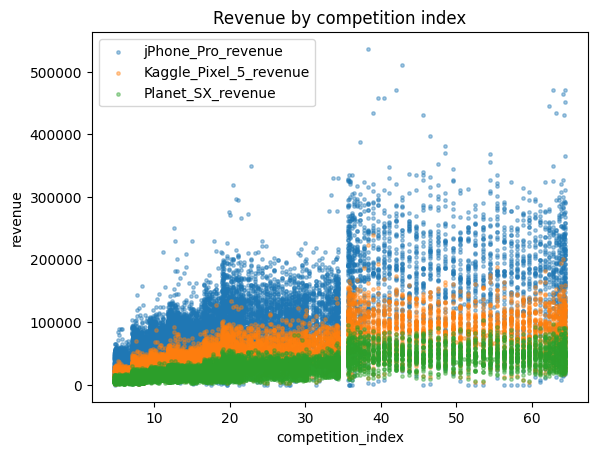

In [280]:
plt.scatter(df['competition_index'],df[jphone], label=jphone,alpha=0.4, s=6)
plt.scatter(df['competition_index'],df[kaggle], label=kaggle,alpha=0.4, s=6)
plt.scatter(df['competition_index'],df[planet], label=planet,alpha=0.4, s=6)
plt.legend()
plt.xlabel('competition_index')
plt.ylabel('revenue')
plt.title('Revenue by competition index');

We notice that there seems to be a correlation and, also, that ther may be a cut-off point in this variable. Also, the dispersion grows

##  Costumer Satisfaction

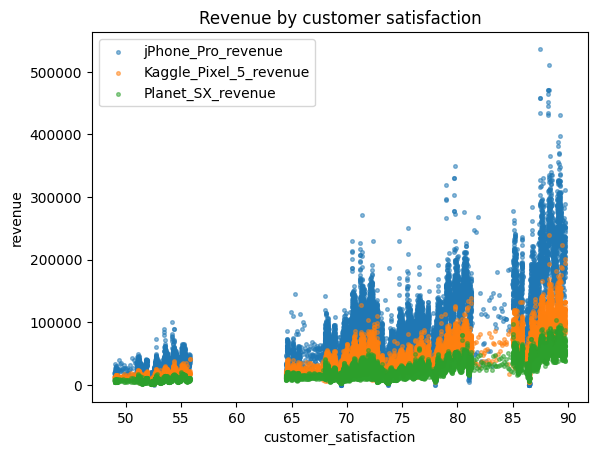

In [281]:
plt.scatter(df['customer_satisfaction'],df[jphone], label=jphone, alpha=0.5, s=7)
plt.scatter(df['customer_satisfaction'],df[kaggle], label=kaggle, alpha=0.5, s=7)
plt.scatter(df['customer_satisfaction'],df[planet], label=planet, alpha=0.5, s=7)
plt.legend()
plt.xlabel('customer_satisfaction')
plt.ylabel('revenue')
plt.title('Revenue by customer satisfaction');

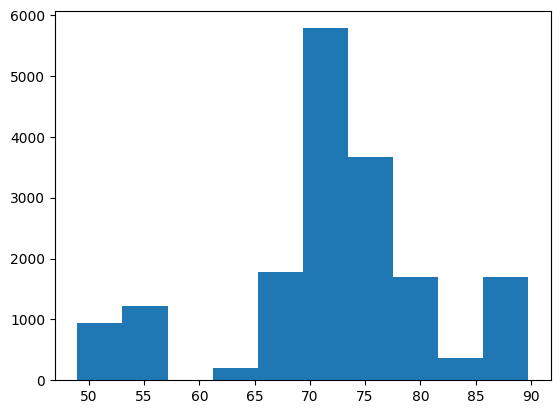

In [282]:
plt.hist(df['customer_satisfaction']);

Once again, there seems to be a correlation with revenue, but this variable may be problematic given the clear inbalance of the predictor, also once again the dispersiont grows.

## Purchasing Power Index

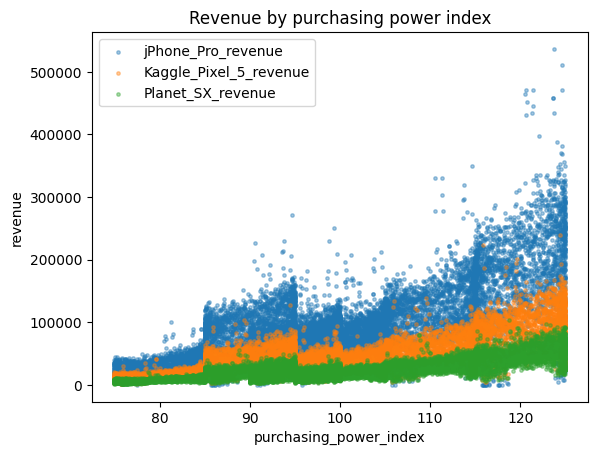

In [287]:
plt.scatter(df['purchasing_power_index'],df[jphone], label=jphone, alpha=0.4, s=6)
plt.scatter(df['purchasing_power_index'],df[kaggle], label=kaggle, alpha=0.4, s=6)
plt.scatter(df['purchasing_power_index'],df[planet], label=planet, alpha=0.4, s=6)
plt.legend()
plt.xlabel('purchasing_power_index')
plt.ylabel('revenue')
plt.title('Revenue by purchasing power index');

once again, there is a correlation with revenue, but the dispersion grows.

## Weather Conditions

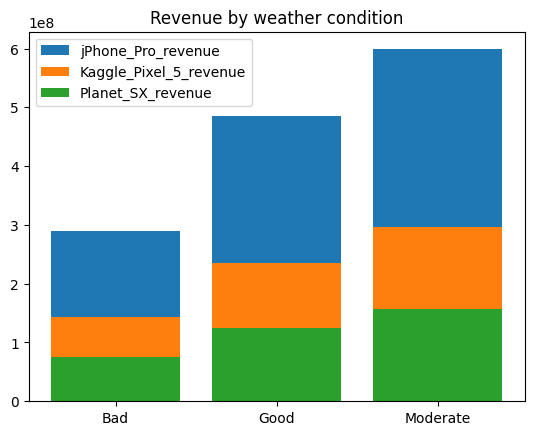

In [300]:
data_by_weather = df.drop('date',axis=1).groupby('weather_condition').sum() # we remove non additive columns

plt.bar(data_by_weather.index, data_by_weather[jphone], label=jphone)
plt.bar(data_by_weather.index, data_by_weather[kaggle], label=kaggle)
plt.bar(data_by_weather.index, data_by_weather[planet], label=planet)
plt.legend()
plt.title('Revenue by weather condition');

we notice that the weather condition is in fact relevant to revenue.

## Tech event

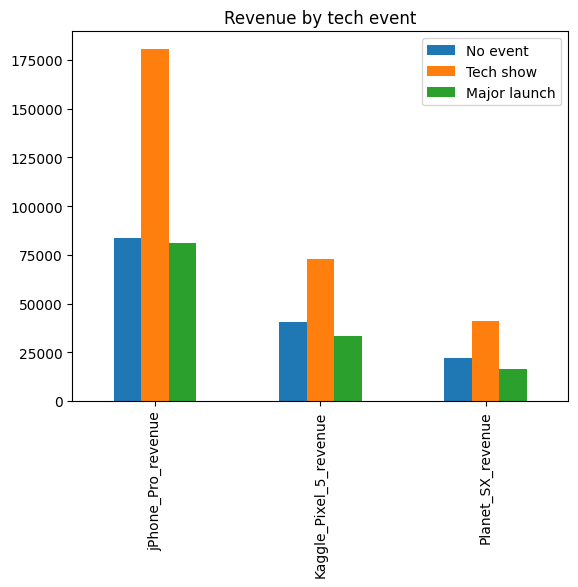

In [387]:
mean_no_event = df[df['tech_event']==''][[jphone,kaggle,planet]].mean()
mean_tech_show = df[df['tech_event']=='Tech Show'][[jphone,kaggle,planet]].mean()
mean_major_lauch = df[df['tech_event']=='Major Launch'][[jphone,kaggle,planet]].mean()

means = pd.concat([mean_no_event,mean_tech_show,mean_major_lauch],axis=1)
means.columns = ['No event','Tech show','Major launch']

means.plot(kind='bar')
plt.title('Revenue by tech event');

We make an unstacked bar plot to see the relationship between tech events and revenue, where we see that the average revenue is higher when there is a tech event and the revenue is similar when there is a major launch, althought slightly lower. Hence, it is likely that this variable is relevant.

## 5G Phase